In [ ]:
Aim: Write a program to implement a simple form of a recurrent neural network e.g., (4-to-1 RNN) to
show that the quantity of rain on a certain day also depends on the values of the previous day.

In [ ]:
Theory: Recurrent Neural Network (RNN) is a type of Neural Network where the output from the
previous step is fed as input to the current step. In traditional neural networks, all the inputs and outputs
are independent of each other, but in cases when it is required to predict the next word of a sentence, the
previous words are required and hence there is a need to remember the previous words. Thus, RNN came
into existence, which solved this issue with the help of a Hidden Layer. The main and most important
feature of RNN is its Hidden state, which remembers some information about a sequence. The state is also
referred to as Memory State since it remembers the previous input to the network. It uses the same
parameters for each input as it performs the same task on all the inputs or hidden layers to produce the
output. This reduces the complexity of parameters, unlike other neural networks.

Epoch 1/100
2/2 [==============================] - 33s 20ms/step - loss: 14.8298
Epoch 2/100
2/2 [==============================] - 0s 87ms/step - loss: 14.4376
Epoch 3/100
2/2 [==============================] - 0s 14ms/step - loss: 14.0553
Epoch 4/100
2/2 [==============================] - 0s 16ms/step - loss: 13.6688
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 13.2985
Epoch 6/100
2/2 [==============================] - 0s 16ms/step - loss: 12.9230
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 12.5640
Epoch 8/100
2/2 [==============================] - 0s 30ms/step - loss: 12.2079
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 11.8564
Epoch 10/100
2/2 [==============================] - 0s 23ms/step - loss: 11.5175
Epoch 11/100
2/2 [==============================] - 0s 26ms/step - loss: 11.1841
Epoch 12/100
2/2 [==============================] - 0s 99ms/step - loss: 10.8574
Epoch 13/100
2/2 [==================

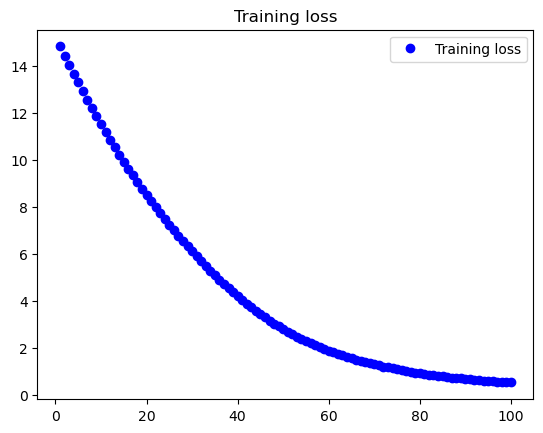

1/1 [==============================] - 3s 3s/step
Previous days' rain data: [2.5 2.2 2.8 3.2]
Expected rain amount for next day: 1.9206153
1/1 [==============================] - 1s 538ms/step
Prediction: 1.9206153


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Define sequence of 50 days of rain data
rain_data = np.array([2.3, 1.5, 3.1, 2.0, 2.5, 1.7, 2.9, 3.5, 3.0, 2.1,
                      2.5, 2.2, 2.8, 3.2, 1.8, 2.7, 1.9, 3.1, 3.3, 2.0,
                      2.5, 2.2, 2.4, 3.0, 2.1, 2.5, 3.2, 3.1, 1.9, 2.7,
                      2.2, 2.8, 3.1, 2.0, 2.5, 1.7, 2.9, 3.5, 3.0, 2.1,
                      2.5, 2.2, 2.8, 3.2, 1.8, 2.7, 1.9, 3.1, 3.3, 2.0])
# Create input and output sequences for training
def create_sequences(values, time_steps):
    x = []
    y = []
    for i in range(len(values)-time_steps):
        x.append(values[i:i+time_steps])
        y.append(values[i+time_steps])
    return np.array(x), np.array(y)
time_steps = 4
x_train, y_train = create_sequences(rain_data, time_steps)
# Define RNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(8, input_shape=(time_steps, 1)),
    tf.keras.layers.Dense(1)
])
# Compile model
model.compile(optimizer="adam", loss="mse")
# Train model
history = model.fit(x_train.reshape(-1, time_steps, 1), y_train, epochs=100)
# Plot loss over time
loss = history.history["loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.title("Training loss")
plt.legend()
plt.show()
# Test model on new sequence
test_sequence = np.array([2.5, 2.2, 2.8, 3.2])
x_test = np.array([test_sequence])
y_test = model.predict(x_test.reshape(-1, time_steps, 1))
# Print input, output, and prediction
print("Previous days' rain data:", test_sequence)
print("Expected rain amount for next day:", y_test[0][0])
prediction = model.predict(np.array([test_sequence]).reshape(1, time_steps, 1))
print("Prediction:", prediction[0][0])


In [ ]:
Aim: Write a program to implement a simple form of a recurrent neural network like LSTM for sentiment
analysis on datasets like UMICH SI650 for similar.


In [ ]:
Theory: LSTM stands for long short-term memory networks, used in the field of Deep Learning. It is a
variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies,
especially in sequence prediction problems. LSTM has feedback connections, i.e., it is capable of
processing the entire sequence of data, apart from single data points such as images.
Sentiment Analysis is an NLP application that identifies a text corpus’s emotional or sentimental tone or
opinion. Usually, emotions or attitudes towards a topic can be positive, negative, or neutral. Sentiment
analysis is a potent tool with varied applications across industries. It is helpful for social media and brand
monitoring, customer support and feedback analysis, market research, etc.


Epoch 1/10
156/156 [==============================] - 151s 612ms/step - loss: 0.6849 - accuracy: 0.5689 - val_loss: 0.6878 - val_accuracy: 0.5523
Epoch 2/10
156/156 [==============================] - 84s 542ms/step - loss: 0.6848 - accuracy: 0.5689 - val_loss: 0.6881 - val_accuracy: 0.5523
Epoch 3/10
156/156 [==============================] - 87s 555ms/step - loss: 0.6840 - accuracy: 0.5689 - val_loss: 0.6908 - val_accuracy: 0.5523
Epoch 4/10
156/156 [==============================] - 90s 576ms/step - loss: 0.6841 - accuracy: 0.5689 - val_loss: 0.6877 - val_accuracy: 0.5523
Epoch 5/10
156/156 [==============================] - 85s 544ms/step - loss: 0.6839 - accuracy: 0.5693 - val_loss: 0.6881 - val_accuracy: 0.5523
Epoch 6/10
156/156 [==============================] - 122s 784ms/step - loss: 0.6840 - accuracy: 0.5693 - val_loss: 0.6877 - val_accuracy: 0.5523
Epoch 7/10
156/156 [==============================] - 38s 247ms/step - loss: 0.6832 - accuracy: 0.5693 - val_loss: 0.6878 - val_

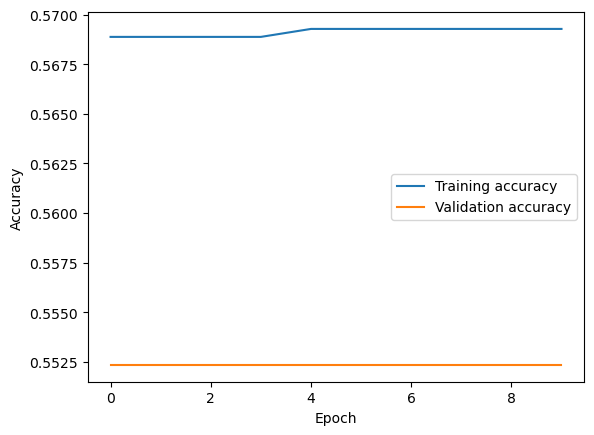

44/44 [==============================] - 4s 42ms/step
Text: and i absolutely loathe the da vinci code <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV> <OOV>
Actual label: 0
Predicted label: 1


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Load data
data = pd.read_csv("training.txt", delimiter="\t", names=["label", "text"])
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["text"],data["label"], test_size=0.2, random_state=42)
# Tokenize words
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
# Convert words to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
# Pad sequences to have same length
max_length = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, padding="post",truncating="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, padding="post",truncating="post")
# Build LSTM model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=32,input_length=max_length),
    tf.keras.layers.LSTM(units=64, dropout=0.2, recurrent_dropout=0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])
# Train model
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=32,validation_split=0.1)
# Evaluate model on test data
loss, accuracy = model.evaluate(X_test_pad, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)
# Plot training and validation accuracy over time
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
# Make predictions on test data
predictions = model.predict(X_test_pad)
# Print input, output, and prediction for random example
index = np.random.randint(0, len(X_test_pad))
text = tokenizer.sequences_to_texts([X_test_pad[index]])[0]
label = y_test.values[index]
prediction = predictions[index][0]
print("Text:", text)
print("Actual label:", label)
print("Predicted label:", round(prediction))